# Thư viện sử dụng

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
# Đọc dữ liệu
df = pd.read_csv('seattle-weather.csv')

In [4]:
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


+ Dữ liệu thời tiết thành phố Seattle - Mỹ
- date : năm tháng ngày
- precipitation : Lượng mưa (mm)
- temp-max : Nhiệt độ cao nhất (°C)
- temp_min : Nhiệt độ thấp nhất (°C)
- wind : Gió (m/s)
- weather : Thời tiết

- Dữ liệu thời tiết trong vòng 4 năm

In [5]:
df.shape

(1461, 6)

Text(0.5, 1.0, 'Count of Weather Categories')

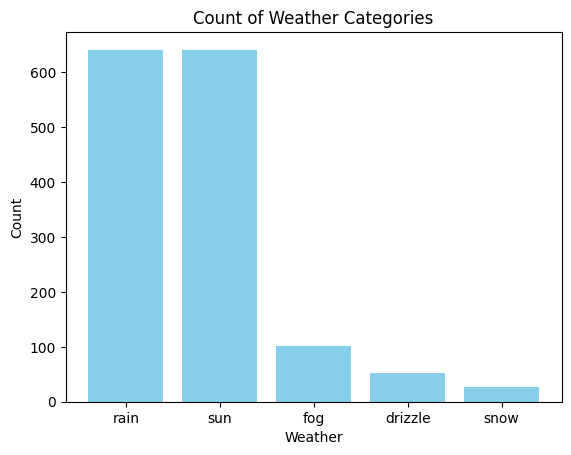

In [11]:
weather_counts = df['weather'].value_counts()
plt.bar(weather_counts.index, weather_counts.values, color='skyblue')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Count of Weather Categories')

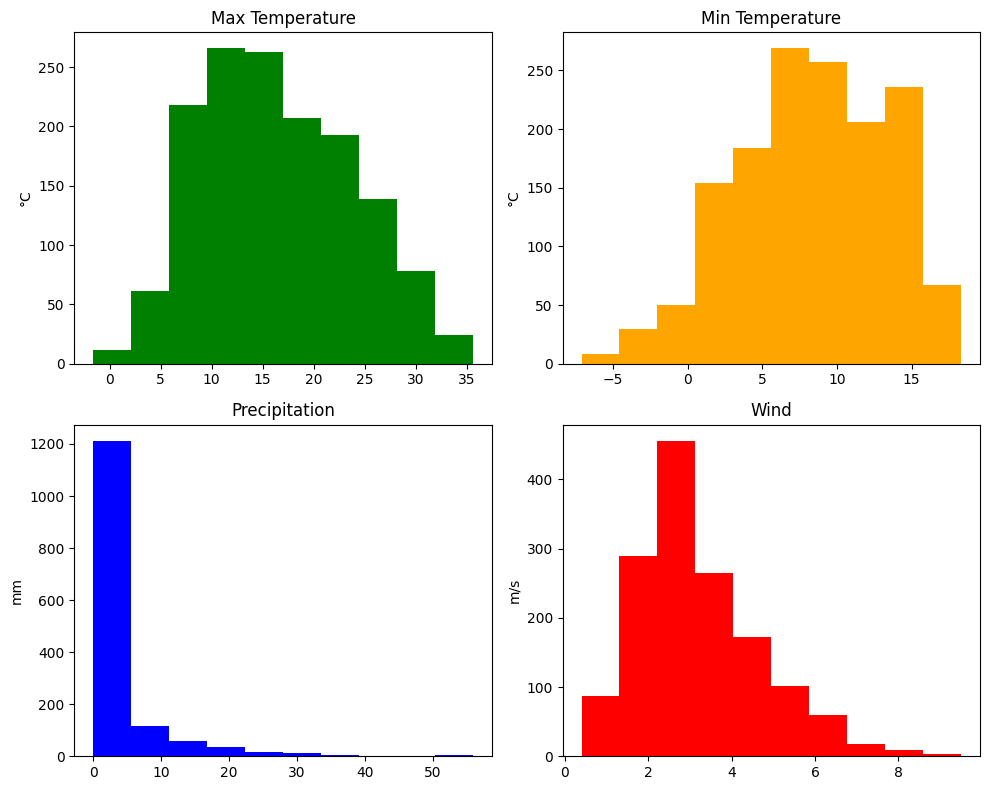

In [19]:
# Tạo một figure và các axes
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Vẽ histogram cho từng cột lên từng axes
df["temp_max"].plot(kind="hist", ax=axs[0, 0], title="Max Temperature", color='green')
axs[0, 0].set_ylabel("°C")

df["temp_min"].plot(kind="hist", ax=axs[0, 1], title="Min Temperature", color='orange')
axs[0, 1].set_ylabel("°C")

df["precipitation"].plot(kind="hist", ax=axs[1, 0], title="Precipitation", color='blue')
axs[1, 0].set_ylabel("mm")

df["wind"].plot(kind="hist", ax=axs[1, 1], title="Wind", color='red')
axs[1, 1].set_ylabel("m/s")

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [12]:
df.iloc[:,1:4]

,precipitation,temp_max,temp_min
0,0.0,12.8,5.0
1,10.9,10.6,2.8
2,0.8,11.7,7.2
3,20.3,12.2,5.6
4,1.3,8.9,2.8
...,...,...,...
1456,8.6,4.4,1.7
1457,1.5,5.0,1.7
1458,0.0,7.2,0.6
1459,0.0,5.6,-1.0


<Axes: >

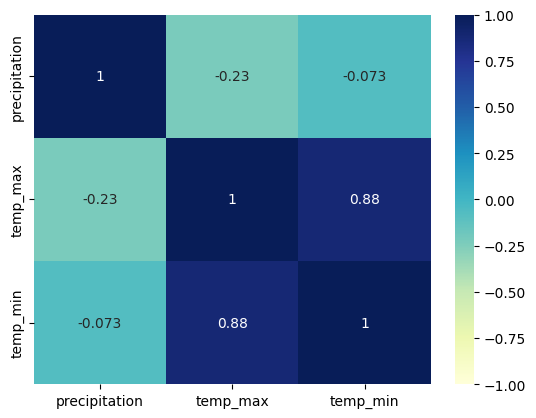

In [15]:

corr_matrix = df.iloc[:,1:4].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)

In [20]:
df.isnull().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

In [21]:
data = df.drop(["date"], axis = 1)

In [22]:
y = data['weather']
features =['temp_max', 'temp_min', 'precipitation', 'wind']
x = data[features]

In [24]:
lc = LabelEncoder()
data["weather"] = lc.fit_transform(data["weather"])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [26]:
knn = KNeighborsClassifier()
knnmodel = knn.fit(x_train, y_train)
knnscore = knn.score(x_test, y_test)*100
print("Accuracy of KNN model is: %.2f"%knnscore)

Accuracy of KNN model is: 77.47


In [28]:
svm = SVC()
svcmodel = svm.fit(x_train, y_train)
svcscore = svm.score(x_test, y_test)*100
print("Accuracy of SVM model is: %.2f"%svcscore)

Accuracy of SVM model is: 81.91
